# Task 3: Neural Networks with TensorFlow/Keras
    Description: Build and train a simple feed-forward neural network to classify images or structured data.
# Objectives:
    Load a dataset (e.g., MNIST digits or a structured dataset) and preprocess it.
    Design a neural network architecture using TensorFlow or Keras.
    Train the model using backpropagation and evaluate it using accuracy and loss curves.
    Tune hyperparameters (e.g., learning rate, batch size) to improve performance.
    Tools: Python, TensorFlow, Keras, pandas, matplotlib.

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [31]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [32]:
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Number of classes: {np.unique(y_train).size}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of classes: 10


In [33]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [34]:
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)

In [35]:
model.compile(
    optimizer=optimizer,
    # Loss for multi-class classification with integer labels
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [36]:
# Tune Hyperparameters: Batch Size and Epochs
batch_size = 128
epochs = 10

In [37]:
# Train the model, storing the history object to plot curves
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9002 - loss: 0.3602 - val_accuracy: 0.9615 - val_loss: 0.1418
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9576 - loss: 0.1429 - val_accuracy: 0.9680 - val_loss: 0.1134
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.0983 - val_accuracy: 0.9738 - val_loss: 0.0993
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9776 - loss: 0.0742 - val_accuracy: 0.9783 - val_loss: 0.0821
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9818 - loss: 0.0596 - val_accuracy: 0.9768 - val_loss: 0.0864
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0472 - val_accuracy: 0.9790 - val_loss: 0.0748
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0387 - val_accuracy: 0.9778 - val_loss: 0.0856
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0307 - val_accuracy: 0.

In [39]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [40]:
# Evaluate the model on the unseen test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - 863us/step - accuracy: 0.9783 - loss: 0.0768


In [41]:
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Test Loss: 0.0768
Test Accuracy: 0.9783


In [42]:
# Get the training history data
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
epochs_range = range(1, epochs + 1)

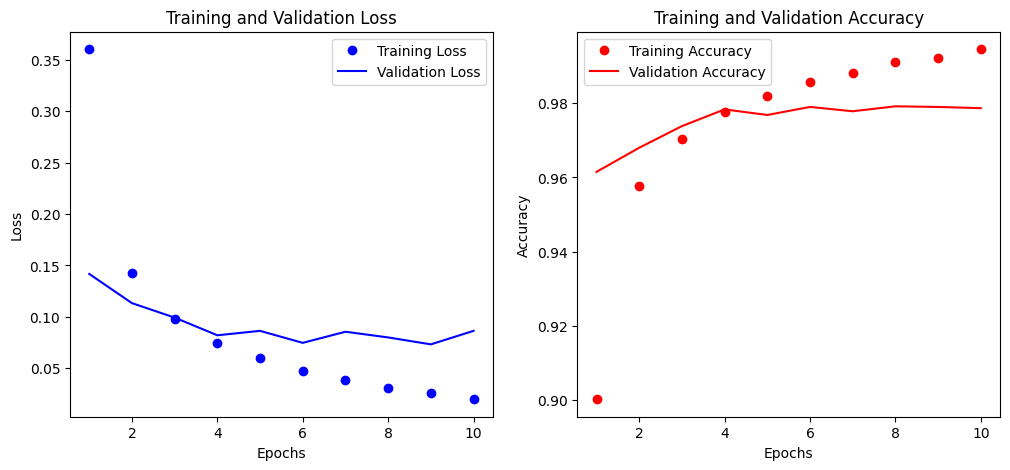

In [43]:
# Plot Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training Loss')
plt.plot(epochs_range, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy_values, 'ro', label='Training Accuracy')
plt.plot(epochs_range, val_accuracy_values, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()